# 0. Importing specpolFlow package

In [1]:
import specpolFlow as pol

# 1 . Create emission line file

In this tutorial, we use the UPENA normalized spectrum `EmissionLine_tutorialfiles/1423137pn.s` of the active cool star BP Tau.

We first load in the spectrum. 

In [2]:
spec = pol.read_spectrum("EmissionLine_tutorialfiles/1423137pn.s")

To create the emission line file, we have to define the transition wavelength `lambda0` and the range with respect to the line center. In the example below, we select the $H_\alpha$ line in a 3 nm window.

In [3]:
# Create emission line profile 
lambda0 = 656.28; lwidth = 1.5
prof = spec.EmissionLine(lambda0 =  lambda0, lwidth = lwidth)

The object `prof` inherits all the atributes from the LSD class. Therefore, you can use all the functionality discussed in the LSDClass Tutorial (i.e., one can normalize, slice, or shift the emission line profile).

Below, we visualize the emission line using the `plot` class function. 

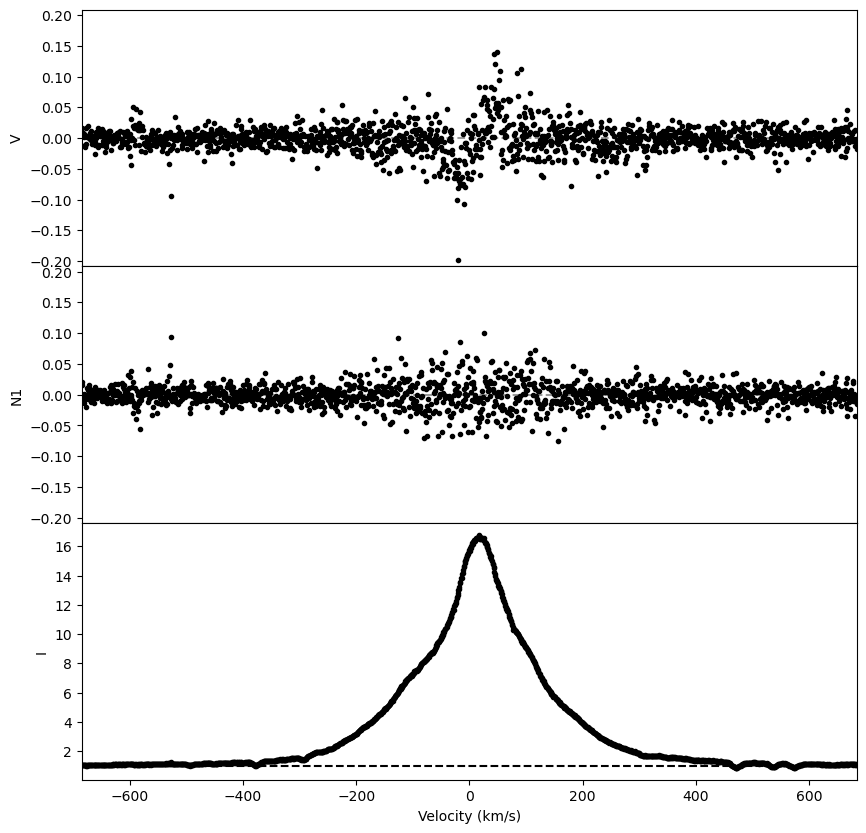

In [4]:
fig, axes = prof.plot()
axes[-1].axhline(1, color='k', ls = '--')

# 2. Normalize the emission profile

Before saving the emission line profile, we can try to improve the normalization using a new continuum based on the mean intensity values at the wings. In the example below, we select all points with velocities lower than -500 km/s or larger than 500 km/s.

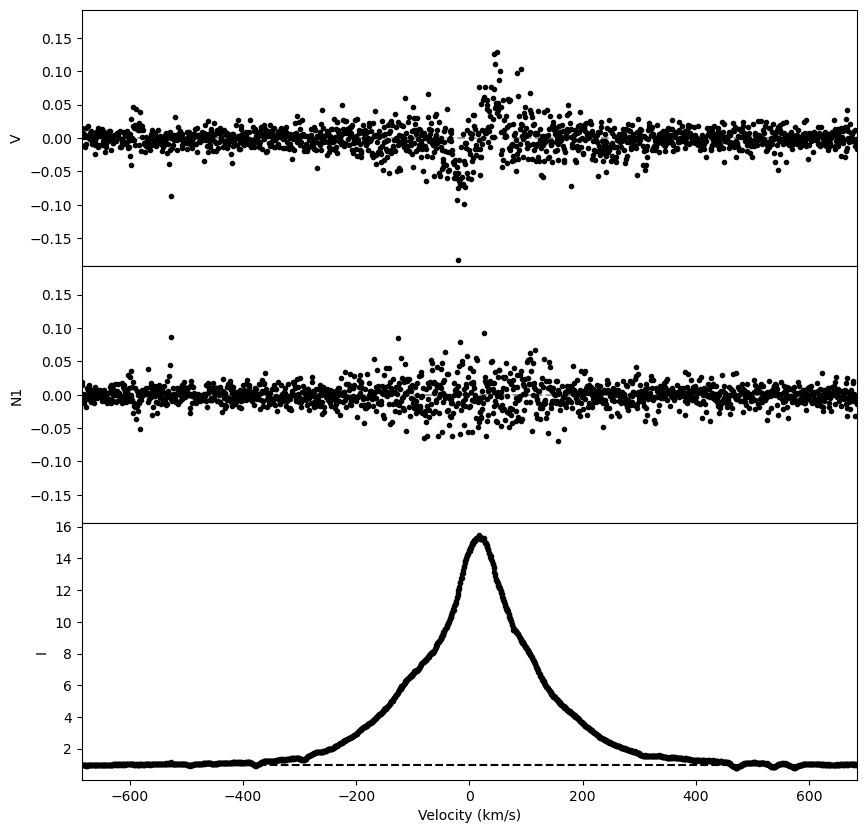

In [5]:
import numpy as np

# Define the continuum range
continuum_range = np.abs(prof.vel) > 500

# Get the new continuum value
continuum_value = np.mean(prof.specI[continuum_range])

# Renormalize the profiles
prof_norm = prof.norm(continuum_value)

# Visualize 
fig, axes = prof_norm.plot()
axes[-1].axhline(1, color='k', ls = '--')

# 3. Saving emission lines

Finally, you can save the emission line into a file running the code below.

In [6]:
prof_norm.save("EmissionLine_tutorialfiles/1423137.Halpha")